# Search for instances where the same bird occurs at multiple ARUs

## Notes on all matches found:

Single song at one points matches other point cluster:

- RK888/RK931: one song at RK931 matches cluster from 888

- RK016: one song from RK614 matches

- one song at RK961 matches individual at RK936

- 902: one song matching from 934

- RK004: one song from RK001 matching

- RK961 one song matches individual from RK936

Individual at both points:
- Rk1033 and RK920: one shared individual
- 935 and 964: one shared individual
- RK1021/1042: one shared individual



In [ ]:
import sys
sys.path.append('../../src/')
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.autonotebook import tqdm

from matplotlib import pyplot as plt
def figsize(w,h):
    plt.rcParams['figure.figsize']=[w,h]
figsize(15,5) #for big visuals
%config InlineBackend.figure_format = 'retina'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def identity(x):
    return x

from opensoundscape import Audio, Spectrogram

# palette with many colors, starts w light grey
palette_w_grey = [(0.9, 0.9, 0.9)] + sns.color_palette("deep") + sns.color_palette("Dark2")
palette = sns.color_palette("deep") + sns.color_palette("Dark2")

In [ ]:
# Download the public Pennsylvania 4-year passive acoustic monitoring dataset and put the path here:
dataset_path = "../../../../pam_dataset_v4/"

In [ ]:
all_cluster_samples = pd.read_csv(
    f"{dataset_path}/all_clips_with_cleaned_clusters.csv",
    parse_dates=["datetime", "date", "time"],
)
all_cluster_samples["features3d"] = all_cluster_samples["features3d"].apply(eval)
all_cluster_samples["time"] = all_cluster_samples["time"].apply(lambda x: x.time())
all_cluster_samples["date"] = all_cluster_samples["date"].apply(lambda x: x.date())
all_cluster_samples["year"] = all_cluster_samples["date"].apply(lambda x: x.year)

/var/folders/d8/265wdp1n0bn_r85dh3pp95fh0000gq/T/ipykernel_35033/3803412807.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_cluster_samples = pd.read_csv(


In [ ]:
points = pd.read_csv(
    f"{dataset_path}/point_list.csv",
    index_col=0,
)
points.head()

,latitude,longitude,utm_E,utm_N,utm_zone,utm_letter
point_code,,,,,,
RK1003,39.862999,-79.462097,631539.746861,4.413683e+06,17.0,S
RK1018,39.899300,-79.485397,629478.450277,4.417678e+06,17.0,S
RK1042,39.807701,-79.486999,629513.564760,4.407509e+06,17.0,S
RK622,41.196098,-78.327004,724146.418784,4.563971e+06,17.0,T
RK732,41.210499,-78.249000,730637.481481,4.565774e+06,17.0,T
...,...,...,...,...,...,...
RK694,41.215401,-78.230103,732204.661192,4.566369e+06,17.0,T
RK733,41.217800,-78.254898,730117.379287,4.566569e+06,17.0,T
RK691,41.218601,-78.239601,731397.007514,4.566699e+06,17.0,T


In [13]:
# add coordinates to the detections
all_cluster_samples = (
    all_cluster_samples.set_index("point_code")
    .join(points[["utm_E", "utm_N"]])
    .reset_index()
)

In [14]:
xy = points[["utm_E", "utm_N"]].values
distance_matrix = []
for i, xyi in enumerate(xy):
    distances = [np.linalg.norm(xy[i] - xyj) for xyj in xy]
    # replace diagonal with inf
    distances[i] = np.inf
    distance_matrix.append(distances)
distance_matrix = np.array(distance_matrix)
closest_idx = np.argmin(distance_matrix, axis=1)
closest_dist = np.min(distance_matrix, axis=1)
closest_point = [points.index[i] for i in closest_idx]
closest_point_dict = {p: c for p, c in zip(points.index.values, closest_point)}

In [15]:
np.median(closest_dist), np.mean(closest_dist), np.min(closest_dist), np.max(
    closest_dist
)

(586.4594210517432, 610.4411266786339, 258.1890906830226, 1772.6584010933095)

/Users/SML161/miniconda3/envs/opso0110/lib/python3.11/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


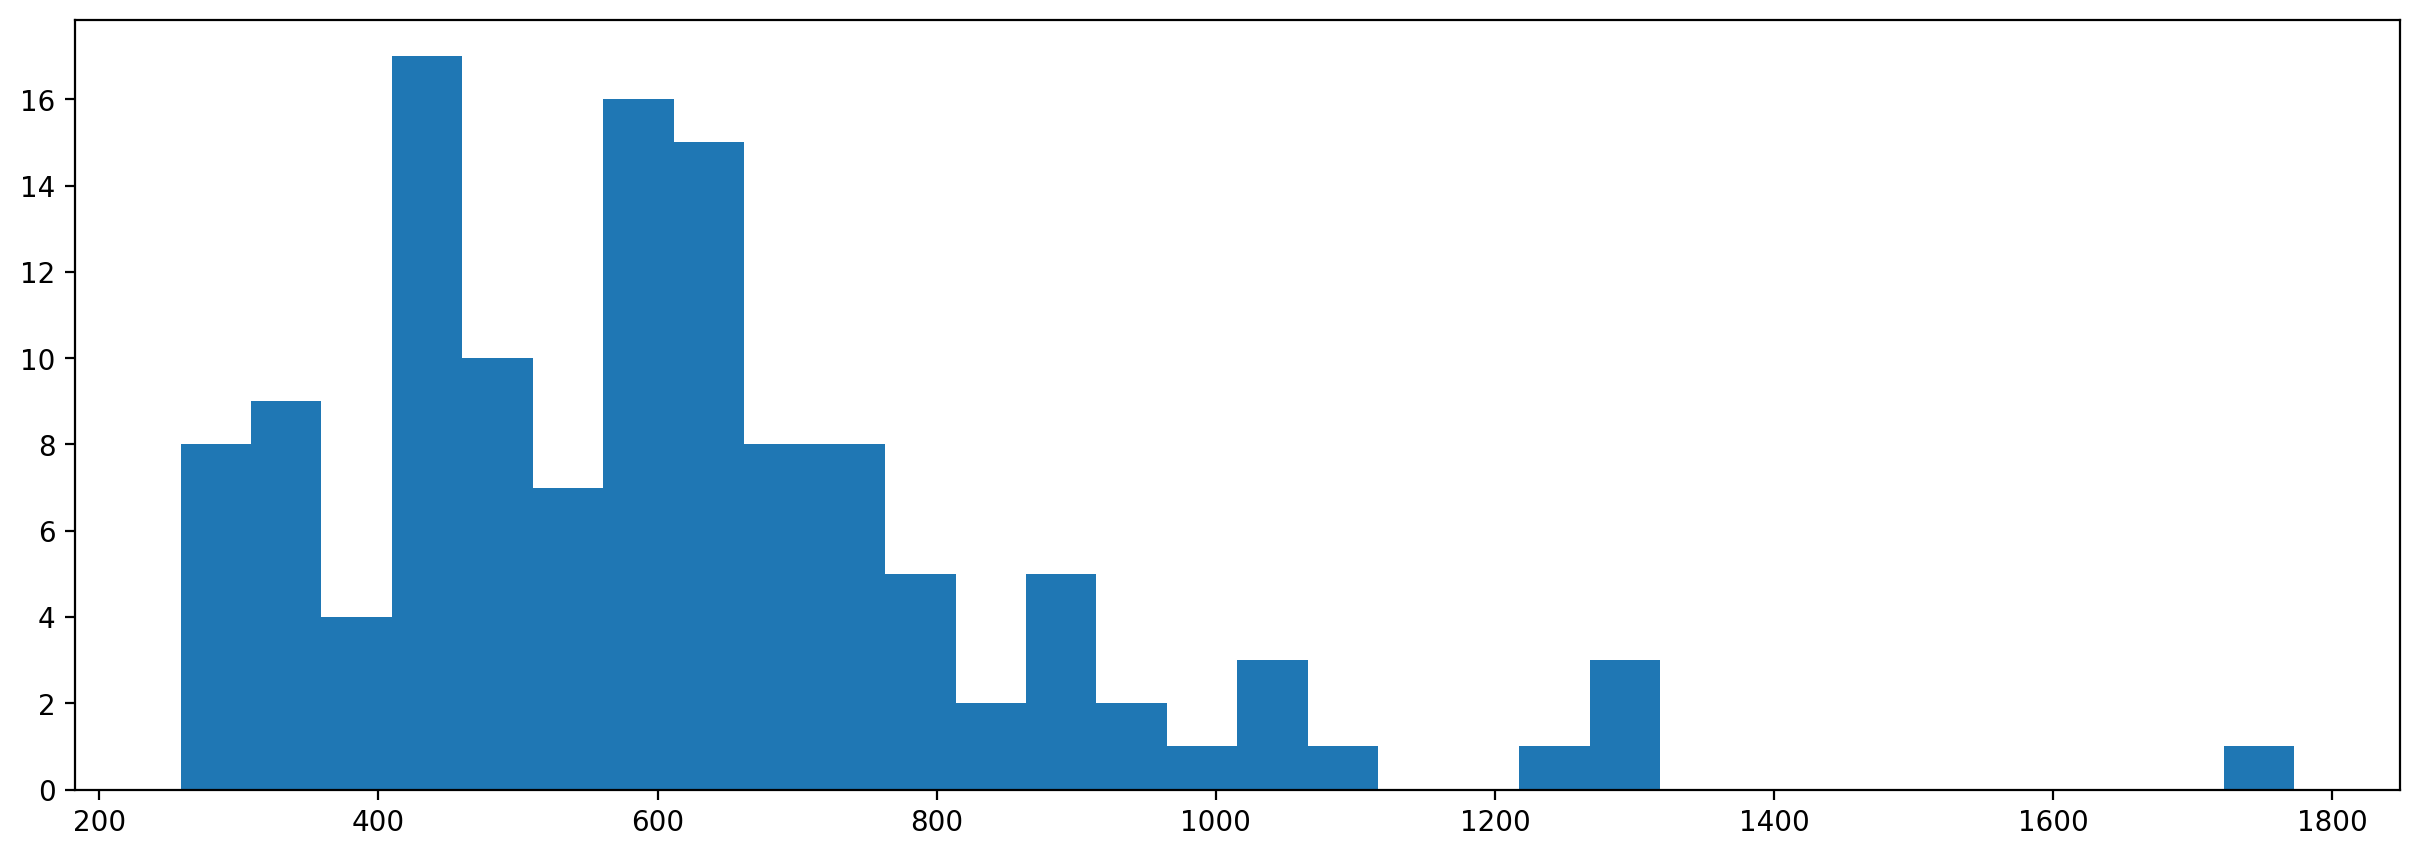

In [16]:
plt.hist(closest_dist, bins=30)
pass

## Inspect samples from nearest point pairs
cluster with the pair of points

In [17]:
# cluster on per-point basis
import numpy as np
import pandas as pd
from sklearn.cluster import HDBSCAN
import random

In [18]:
from IPython.display import clear_output

This cell visualizes detections of songs that are clustered together but were recorded at different ARUs

RK964


/var/folders/d8/265wdp1n0bn_r85dh3pp95fh0000gq/T/ipykernel_35033/3620432508.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  point_dets["label"] = hdb.labels_


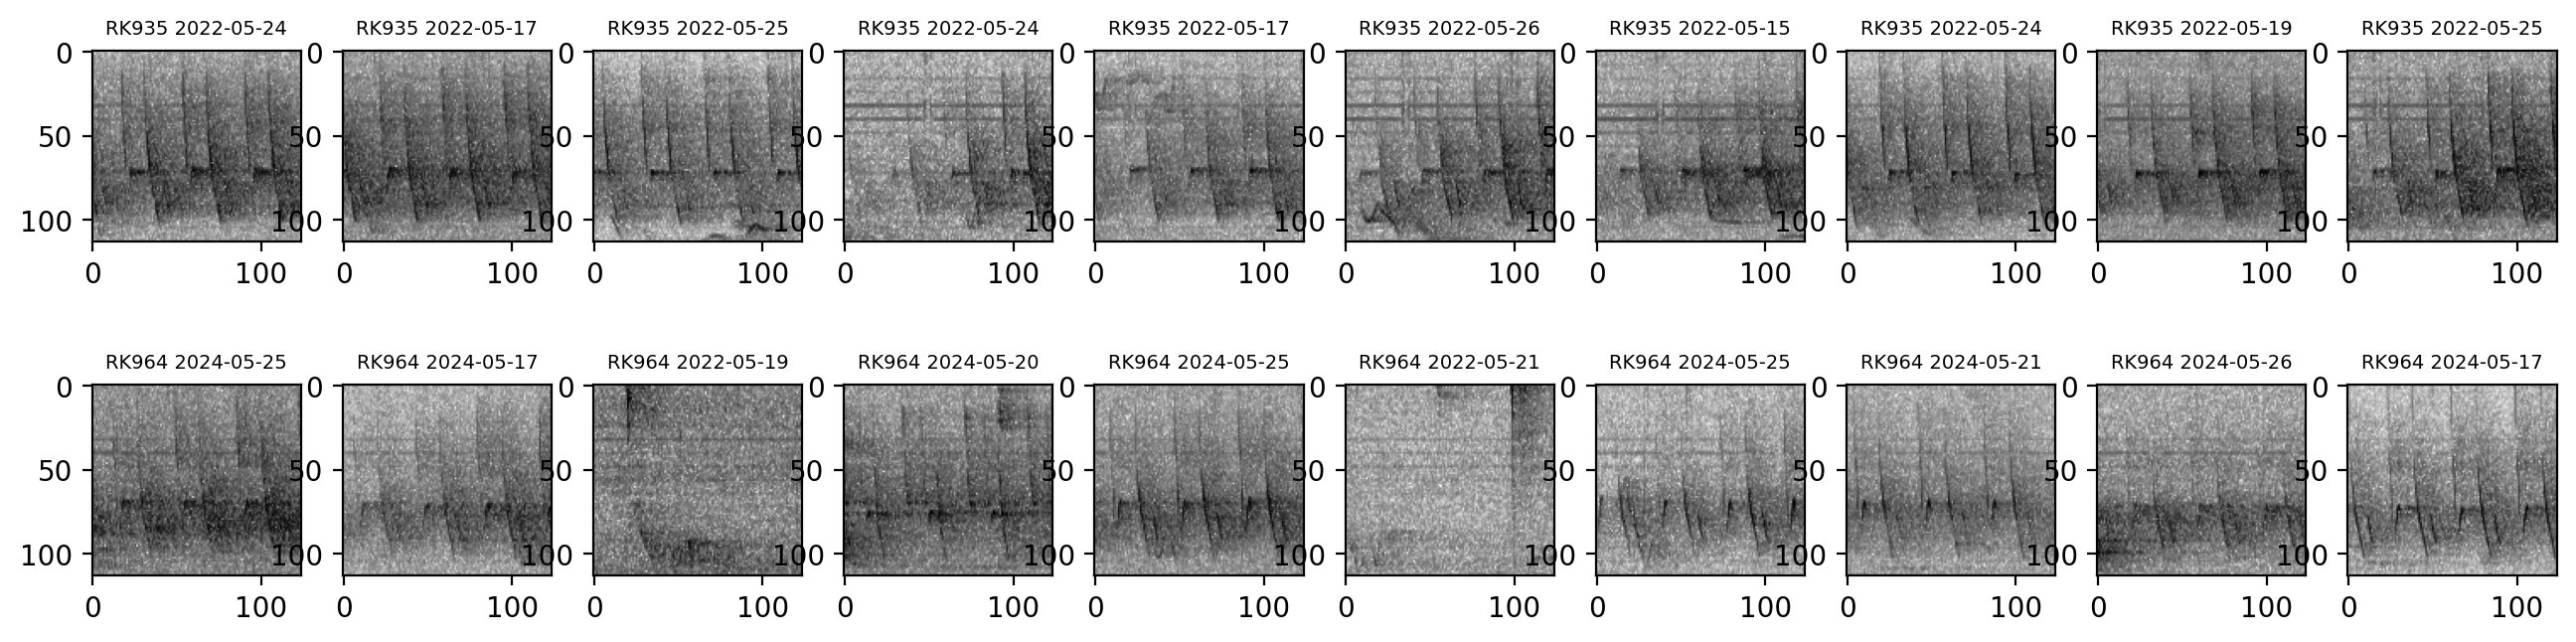

In [19]:
# specify local paths
weights_path = "../../../checkpoints/full_2025-04-10T11:02:36.028451_best.pth"
features_path = f"{dataset_path}/oven_clips_aiid_embeddings_tsne-3d.npy"

# Random Seed
random_seed = 20250411
np.random.seed(random_seed)
random.seed(random_seed)

# load embeddings of strict detections from AIID model
ovenbird_clips = pd.read_csv(f"{dataset_path}/pam_dataset_clips.csv")
features = np.load(features_path)
ovenbird_clips["features3d"] = features.tolist()

# reduce dimensions and cluster one point at a time

skip_until = "RK1021"
skip = True
for (
    point_code
) in points.index:  # , point_dets in tqdm(ovenbird_clips.groupby("point_code")):
    if point_code == skip_until:
        skip = False
    if skip:
        continue

    print(point_code)

    # add songs from the nearest point
    point_dets = ovenbird_clips[
        ovenbird_clips.point_code.isin([point_code, closest_point_dict[point_code]])
    ]
    feat = np.vstack(point_dets["features3d"].values)
    # for min_samples in (10, 30, 50, 100, 300):
    min_samples = 30
    if len(point_dets) < min_samples:
        continue
    # print(f"clustering with min_samples={min_samples}")
    hdb = HDBSCAN(
        min_samples=min_samples, allow_single_cluster=True, store_centers="medoid"
    )
    hdb.fit(feat)
    point_dets["label"] = hdb.labels_

    # find labels that cross points

    n_points_per_label = point_dets.groupby("label")["point_code"].nunique()
    if -1 in n_points_per_label.index:
        n_points_per_label = n_points_per_label.drop(index=-1)
    cross_point_labels = n_points_per_label[n_points_per_label > 1].index.values

    nper = 10
    for label in cross_point_labels:
        dets = point_dets[point_dets["label"] == label]

        fig, axes = plt.subplots(2, nper, figsize=(16, 4))
        current_row = 0
        # all_audio = np.zeros((3,10),dtype=object)
        for point, point_samples in dets.groupby("point_code"):
            if len(point_samples) > 10:
                point_samples = point_samples.sample(10)
            for j, row in point_samples.reset_index().iterrows():
                if j >= nper:
                    break
                ax = axes[current_row, j]
                a = Audio.from_file(
                    f"{dataset_path}/audio/{row.clip_name}", offset=1, duration=1
                )
                ax.imshow(
                    Spectrogram.from_audio(a).bandpass(2000, 9000).spectrogram[::-1],
                    cmap="Greys",
                )
                ax.set_title(f"{point} {row.date}", fontsize=7)

            # break
            current_row += 1

        if current_row >= 2:
            break

        # remove all axes
        for r in axes:
            for ax in r:
                ax.axis("off")  # Hide axes
                ax.set_xticks([])  # Remove x ticks
                ax.set_yticks([])  # Remove y ticks

        # Adjust spacing between images
        plt.subplots_adjust(wspace=0.1, hspace=0.2)

    plt.show()
    if input("x to exit, Enter to continue to next set") == "x":
        skip_until = point_code
        break
    clear_output()

check the distances between pairs of points where indistinguishable songs were found:

In [ ]:
points_list = list(points.index)
# distance_matrix#points_list.index('RK1021')
distance_df = pd.DataFrame(distance_matrix, index=points.index, columns=points_list)

In [ ]:
distance_df.at["RK1021", "RK1042"]

494.31059758240696

In [ ]:
distance_df.at["RK1033", "RK920"]

627.7916566522404

In [ ]:
distance_df.at["RK935", "RK964"]

323.68712199438613

In [ ]:
distance_df.at["RK016", "RK614"].round(), distance_df.at["RK888", "RK931"].round()

(793.0, 453.0)